# ECE/CS 434 | MP1: Visualizing Data
<br />
<nav>
    <span class="alert alert-block alert-warning">Due on Monday Feb 5th 11:59PM on Gradescope</span> 
</nav><br> 

 

## Objective
The goal of this MP is for you to become familiar with sensor data collected from mobile phones. We will work with accelerometer data, microphone recordings and Wi-Fi RSSI. The data provided to you will be relevant to future MPs, so hopefully this will give you a head start. After completing this MP, you should be able to:
- Quickly visualize readings from various mobile phone sensors.
- Interpret various aspects of sensor data from plots.

---
## Imports & Setup
The following `code` cell, when run, imports the libraries that you will require for the coding part of this MP. The use of other standard libraries is allowed but uneeded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Accelerometer
Three sets of accelerometer data are provided to you in `accl/*.csv` files. For each file, there are three columns, representing the accelerometer readings in three local axes x, y and z (in that order) (unit: $m / s^{2}$). Please refer to [this](https://www.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png) for the defination of axes. The accelerometer is sampled at $100\text{ Hz}$. 

#### Exercise 1
For each set of data (CSV file), plot the accelerometer readings over time. Clearly label the x and y axes of the plot, and create a legend indicating what local axes (x, y, or z) each line in your plot corresponds to. For each set of readings, you may instead use different subplots for different accelerometer axes,  if you find that more readable.

Please enter your solution in the `code` cell below:

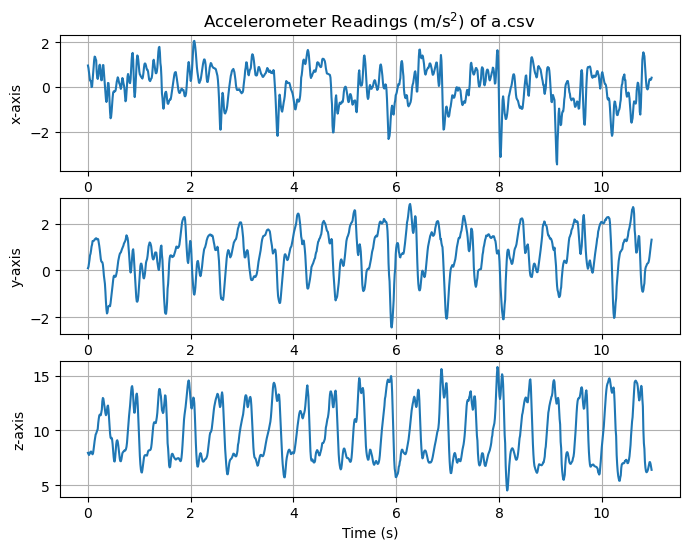

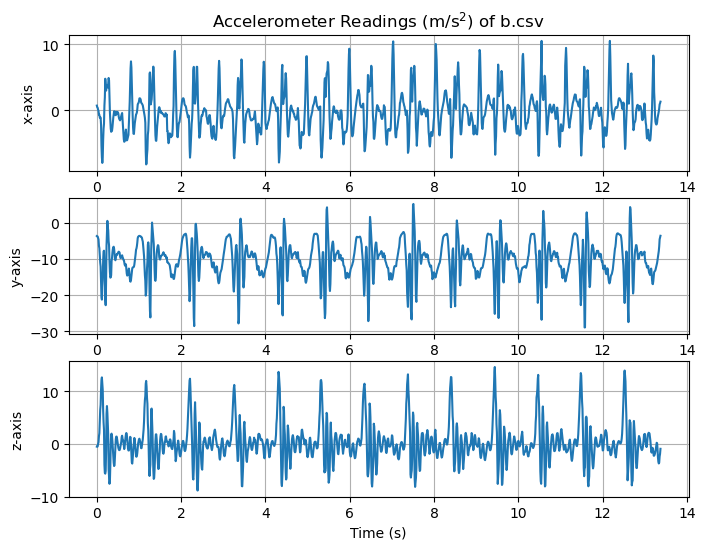

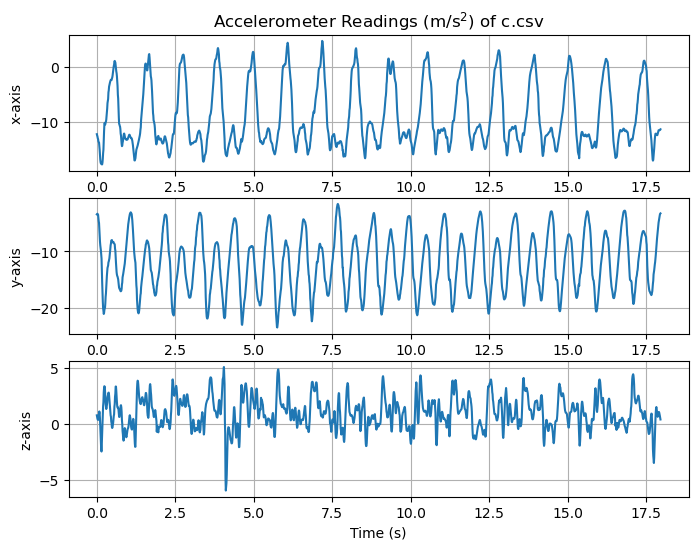

In [2]:
# Exercise 1 code here:
accl_a = pd.read_csv('./accl/a.csv', header=None).to_numpy()
accl_b = pd.read_csv('./accl/b.csv', header=None).to_numpy()
accl_c = pd.read_csv('./accl/c.csv', header=None).to_numpy()

for i, accl in zip(['a', 'b', 'c'], [accl_a, accl_b, accl_c]):
    # plt.figure(figsize=(8,6))
    # plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,0], label='x')
    # plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,1], label='y')
    # plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,2], label='z')
    # plt.title('{}.csv'.format(i))
    # plt.xlabel('Time (s)')
    # plt.ylabel('Accelerometer readings ($\mathregular{m/s^{2}}$)')
    # plt.legend()
    # plt.grid()
    
    plt.figure(figsize=(8,6))
    plt.subplot(3,1,1)
    plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,0])
    plt.title('Accelerometer Readings ($\mathregular{m/s^{2}}$) of %s.csv'%i)
    plt.ylabel('x-axis')
    plt.grid()
    plt.subplot(3,1,2)
    plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,1])
    plt.ylabel('y-axis')
    plt.grid()
    plt.subplot(3,1,3)
    plt.plot(0.01 * np.arange(accl.shape[0]), accl[:,2])
    plt.xlabel('Time (s)')
    plt.ylabel('z-axis')
    plt.grid()


#### Exercise 2:
The accelerometer readings were collected under three circumstances: 
<ol type="A">
  <li>Senario A: walking with phone in pant pocket</li>
  <li>Senario B: walking with phone held in the hand statically as if the user is looking at it while walking</li>
  <li>Senario C: walking with phone in hand and the hand swinging</li>
</ol>

Carefully observe the graphs from Exercise 1 and identify which scenario each corresponds to. 

<div class="alert alert-block alert-info"><b>Hint:</b> When phone is held statically in the hand, the local y axis is relatively aligned with the walking direction. Acceleration in which direction is relatively small? When phone is in hand and the hand is swinging, the local z axis is perpendicular to your palm. Acceleration in which direction is relatively small? </div>

Please enter your answer in the `markdown` cell below: 

**Exercise 2 Answer**:
* Data `a.csv` is for: __Senario B__
* Data `b.csv` is for: __Senario A__
* Data `c.csv` is for: __Senario C__

#### Exercise 3

For the senario B (phone held static) in the exercise above, what is the final velocity of the phone in the y direction? Assume that the initial velocity is $0$, and that the phone orientation is unchanged throughout the process.

<div class="alert alert-block alert-info"><b>Hint:</b> You will need to perform integration. </div>

Please enter your solution in the `code` cell below.

In [3]:
# Exercise 3 code here:
vel = 0
for i in range(accl_a.shape[0]):
    vel = vel + accl_a[i,1] * 0.01

print("The final velocity of the phone in the y direction is: ", vel)

The final velocity of the phone in the y direction is:  7.899058974289999


#### Exercise 4

Typical walking speed is $1.5\frac{m}{s}$. What causes the discrepancy between this expected speed and your result in Exercise 3?

Please enter your answer in the `markdown` cell below: 

**Exercise 4 Answer**: __The acceleration caused by the noise accumulates over time, resulting in an increasing final velocity.__

---
## Microphone
You are given two microphone recordings from two different microphones on the same device. In `microphone/1.csv`, the first column corresponds to samples collected by the first microphone and the second column corresponds to the second microphone. The sampling rate of the microphones are $16\text{ kHz}$. 

#### Exercise 5
Plot the microphone recordings over time. Clearly label the x and y axes, and create a legend to indicate which microphone each line corresponds to. Note that it is okay if the lines look like they overlap.

Please enter your solution in the `code` cell below.

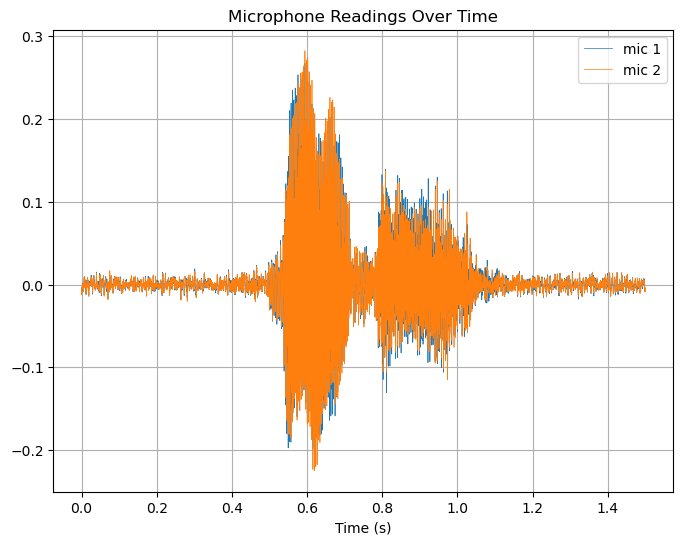

In [4]:
# Exercise 5 code here:
mic = pd.read_csv('./microphone/1.csv', header=None).to_numpy()
time = np.arange(mic.shape[0])

plt.figure(figsize=(8,6))
plt.plot(np.arange(mic.shape[0]) / 16000, mic[:,0], linewidth=0.5, label='mic 1')
plt.plot(np.arange(mic.shape[0]) / 16000, mic[:,1], linewidth=0.5, label='mic 2')
plt.title('Microphone Readings Over Time')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# plt.figure(figsize=(8,6))
# plt.subplot(2,1,1)
# plt.plot(np.arange(data.shape[0]) / 16000, data[:,0], linewidth=0.5)
# plt.title('Microphone Readings Over Time')
# plt.ylabel('x-axis')
# plt.grid()
# plt.subplot(2,1,2)
# plt.plot(np.arange(data.shape[0]) / 16000, data[:,1], linewidth=0.5)
# plt.xlabel('Time (s)')
# plt.ylabel('y-axis')
# plt.grid()


#### Exercise 6
Zoom in to your plot from Exercise 5. How many samples does mic 1 lag behind mic 2 by? You only need to provide a rough estimate.

You may use the optional `code` cell below if you need to plot again. Please enter your answer in the `markdown` cell below: 

In [5]:
# (Optional) Exercise 6 code here:
# %matplotlib widget
# plt.figure(figsize=(8,6))
# plt.plot(np.arange(mic.shape[0]) / 16000, mic[:,0], 'o-', linewidth=0.5, markersize=0.5, label='x')
# plt.plot(np.arange(mic.shape[0]) / 16000, mic[:,1], 'o-', linewidth=0.5, markersize=0.5, label='y')
# plt.title('Microphone Readings Over Time')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.grid()

from scipy import signal
corr = signal.correlate(mic[:,0], mic[:,1], mode="full")
lags = signal.correlation_lags(len(mic), len(mic), mode="full")
lag = lags[np.argmax(corr)]


**Exercise 6 Answer**: Mic 1 lags behind Mic 2 by 1 samples.

---
## Wi-Fi
Wi-Fi RSSI (Received Signal Strength Indicator) is a measurement of how well your device can receive signals from a given access point or router. A user walks around a room that has 3 Wi-Fi access points. You are given the RSSI reading from their smartphone in this format: $(\text{SSID}, \text{HH:MM:SS}, \text{RSSI})$. SSID (Service Set Identifier) is a unique identifier that distinguishes between access points.

#### Exercise 7
For every unique access point, plot the RSSI over time. Clearly label the x and y axes, and create a legend to indicate which access point each line corresponds to. You may create separate graphs if you think that is more readable.

Please enter your solution in the `code` cell below.

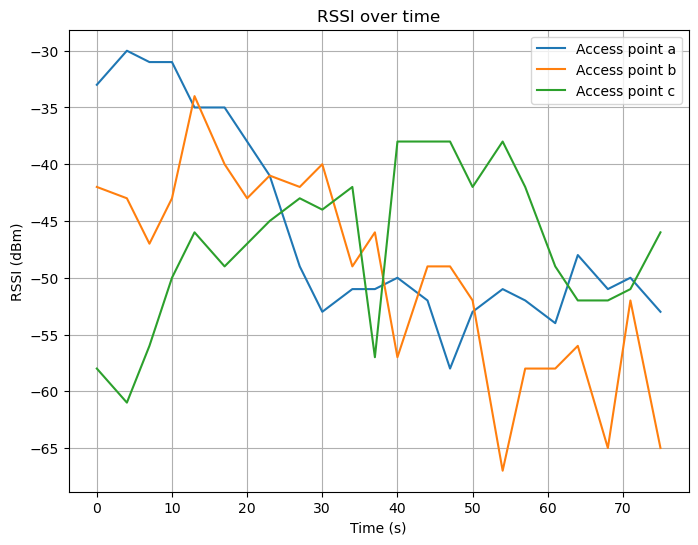

In [6]:
# Exercise 7 code here:
%matplotlib inline
wifi = pd.read_csv('./wifi/1-walk-1.csv')

def get_sec(time):
    sec = []
    for i in range(time.shape[0]):
        h, m, s = time[i].split(':')
        sec.append(3600 * int(h) + 60 * int(m) + int(s))
    return np.array(sec)

a_time = get_sec(wifi['Time'][wifi['SSID'] == 'a'].to_numpy())
b_time = get_sec(wifi['Time'][wifi['SSID'] == 'b'].to_numpy())
c_time = get_sec(wifi['Time'][wifi['SSID'] == 'c'].to_numpy())
a_rssi = wifi['RSSI'][wifi['SSID'] == 'a'].to_numpy()
b_rssi = wifi['RSSI'][wifi['SSID'] == 'b'].to_numpy()
c_rssi = wifi['RSSI'][wifi['SSID'] == 'c'].to_numpy()

plt.figure(figsize=(8,6))
plt.plot(a_time - a_time[0], a_rssi, label='Access point a')
plt.plot(b_time - b_time[0], b_rssi, label='Access point b')
plt.plot(c_time - c_time[0], c_rssi, label='Access point c')
plt.title('RSSI over time')
plt.xlabel('Time (s)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.grid()

# plt.figure(figsize=(8,6))
# plt.subplot(3,1,1)
# plt.plot(a_time - a_time[0], a_rssi)
# plt.title('RSSI (dBm) over time')
# plt.ylabel('Point a')
# plt.grid()
# plt.subplot(3,1,2)
# plt.plot(b_time - b_time[0], b_rssi)
# plt.ylabel('Point b')
# plt.grid()
# plt.subplot(3,1,3)
# plt.plot(c_time - c_time[0], c_rssi)
# plt.xlabel('Time (s)')
# plt.ylabel('Point c')
# plt.grid()


#### Exercise 8
File `wifi/room.png` shows a layout of the room. The locations of the three Wi-Fi access points are annotated on the figure. Think of a possible **straight-line path** of how the user walked in the room. What are the starting and ending coordinates of this straight-line path? Reading your graph from Exercise 7 and eyeballing to give a rough estimate would suffice.

Please enter your answer in the `markdown` cell below:

**Exercise 8 Answer**:
* Starting coordinates are: ( 1 , 3 )
* Ending coordinates are: ( 4 , 3 )

---
## Submission
This Jupyter notebook is the only thing you need to submit to Gradescope. Please make sure that:
* All graphs and results are outputted and readable.
* All short-answer markdown cells are filled in.

---
## Rubric
| Exercise | Rubric                                                    | Points       |
|---------:|:----------------------------------------------------------|-------------:|
| 1        | All 3 accelerometer plots are correct and clearly labeled | $3 \times 2$ |
| 2        | Answer is correct                                         | $3$          |
| 3        | Answer is correct                                         | $1$          |
| 4        | Answer is correct                                         | $1$          |
| 5        | Microphone plot is correct and clearly labeled            | $6$          |
| 6        | Answer is correct                                         | $4$          |
| 7        | Wi-Fi plot is correct and clearly labeled                 | $6$          |
| 8        | Answer is correct                                         | $4$          |